In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [2]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Columns:
- CustomerID – unique identifier for each customer.
- Gender – categorical (Male/Female).
- Age, Annual Income (k$), Spending Score (1–100) – numerical features.
- No missing values (all 200 non-null).

Clean dataset: no missing values or mixed data types, so ready for analysis or clustering.
Balanced attributes: demographic (Gender, Age) + behavioral (Income, Spending Score), ideal for customer segmentation.

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Age range: 18–70 years old

Annual income: 15k–137k USD

Spending score: 1–99 (1 = low spending, 100 = high spending)'

Insights
- Most customers are young to middle-aged adults. 50% are below 36, indicating a younger customer base.
- Income distribution is widely spread — some customers are in the premium segment, while many are in mid-income levels.
- Spending habits vary greatly: some spend heavily, while others are very conservative. The even median (50) suggests balanced overall behavior.


In [5]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'CustomerID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,

In [6]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Number of duplicate rows:
0


No duplicates nor Missing values

In [7]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Income"})
df = df.rename(columns={"Spending Score (1-100)": "Score"})
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(
    df,
    x='Income',
    y='Score',
    z='Age',
    color='Age',
    color_continuous_scale='magma',
    size_max=10,
    title='3D Scatter Plot: Income vs Score vs Age'
)

# Optional: customize look
fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.update_layout(scene=dict(
    xaxis_title='Income',
    yaxis_title='Score',
    zaxis_title='Age'
))

fig.show()


Spending behavior varies across income and age
- There isn’t a linear relationship between income and spending score — high-income customers don’t always spend more.
- Some high earners (income > 100k) have low spending scores, indicating savers or selective buyers.

Younger customers dominate higher spending scores

- The younger segment (age 20–35) tends to cluster toward higher spending scores (60–100).

- Older customers (50+) generally have lower spending scores, showing more cautious or necessity-based spending.

- This suggests age is a stronger driver of spending behavior than income in this dataset.

Clear segmentation potential
- Young High Spenders: Mid-income, high spending.

- Older Low Spenders: High income, low spending.

- Moderate Spenders: Spread across ages with balanced spending.

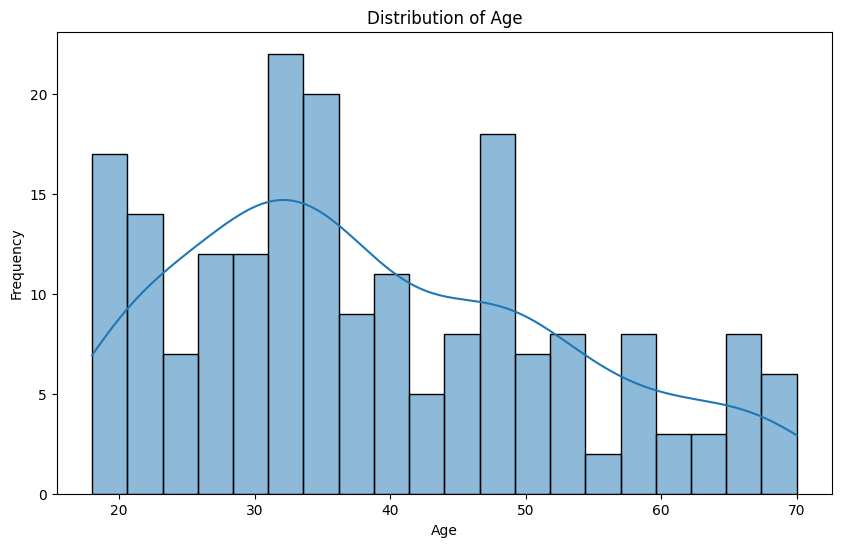

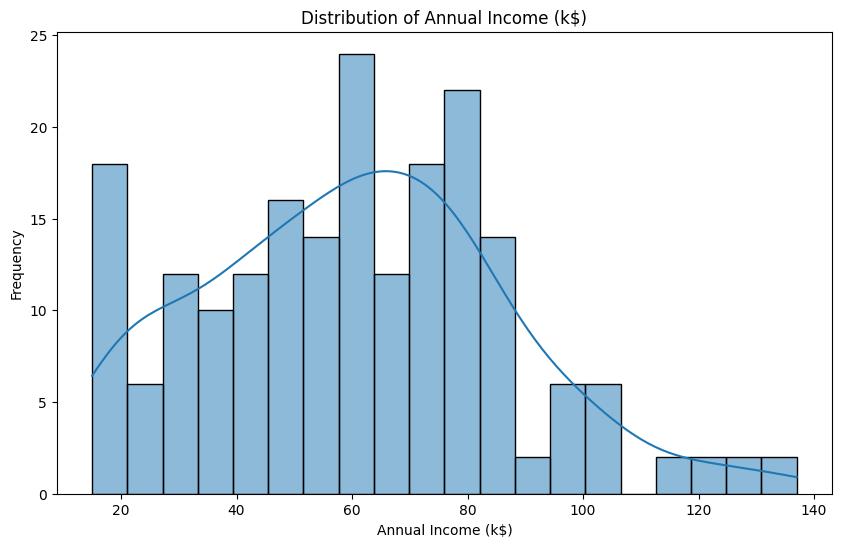

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution plot for Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, bins=20)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

- Distribution of Age: This plot appears to be somewhat skewed to the right, indicating that there are more younger customers than older customers in this dataset. The peak of the distribution is somewhere between 20 and 40 years old.
- Distribution of Annual Income (k$): This plot shows a roughly normal distribution, with a peak around the 60k mark. This suggests that the majority of customers have an annual income around this value, with fewer customers having very low or very high incomes.

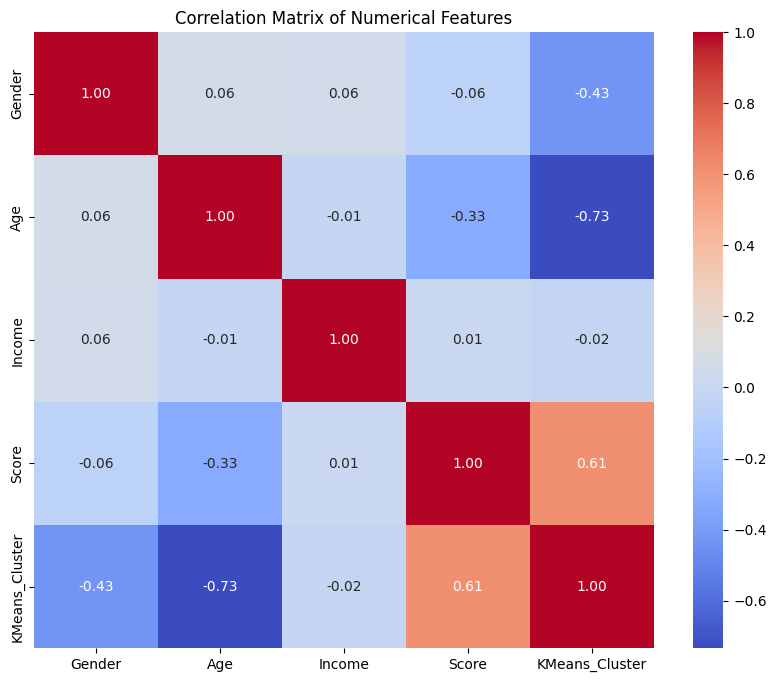

In [30]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Age - KMeans_Cluster (-0.73): Strong negative — younger customers are in high-spending clusters.

Score - KMeans_Cluster (0.61): Strong positive — higher spending scores align with specific clusters.

Gender - KMeans_Cluster (-0.43): Moderate negative — some clusters are gender-influenced.

Age - Score (-0.33): Moderate negative — older customers spend less.

Income - Others (~0): Very weak correlation — income has little impact on spending or cluster grouping.

In [12]:
# Encode Gender
from sklearn.preprocessing import OneHotEncoder

one_hot_map = {
    'Gender': {'Female': 0, 'Male': 1},
}

for col, mapping in one_hot_map.items():
    df[col] = df[col].map(mapping)


df.sample(n = 5)

,CustomerID,Gender,Age,Income,Score
72,73,0,60,50,49
162,163,1,19,81,5
157,158,0,30,78,78
147,148,0,32,77,74
99,100,1,20,61,49


In [13]:
# create new dataframe that consist only annual income and spending score
df = df[['Gender', 'Age', 'Income', 'Score']]
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Data Scaling (Min-Max Scaler)



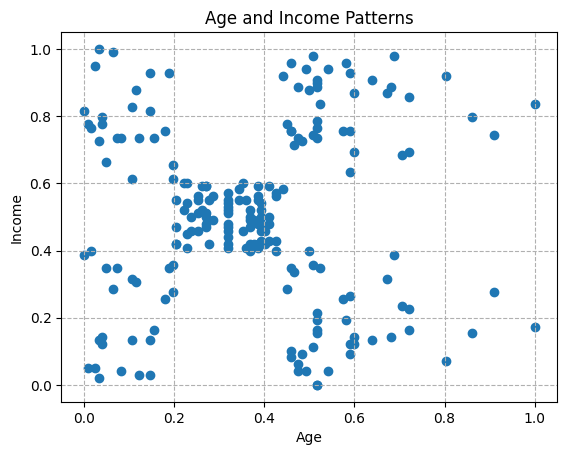

In [14]:
# scale dataset with Min Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_minmax_scaled.head()

# visualization
plt.scatter(df_minmax_scaled["Income"], df_minmax_scaled["Score"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns")
plt.show()

Scaling is needed for distance-based methods because K-Means algorithms rely on calculating distances between data points.

If the features are on different scales, for example, income in thousands and age in years—larger values will dominate the distance calculation, making the model biased toward those features. Scaling (e.g., using standardization or normalization) ensures that all features contribute equally to the distance computation, improving accuracy and model performance.

# K-Means Clustering

In [15]:
from sklearn.cluster import KMeans

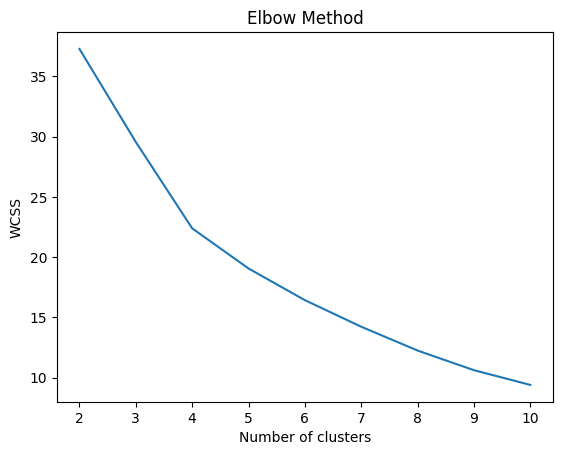

In [16]:
wcss = []
for i in range(2, 11):   #clusters 2-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_minmax_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters       WCSS
0                   2  37.272272
1                   3  29.552858
2                   4  22.390960
3                   5  19.060907
4                   6  16.434553
5                   7  14.229306
6                   8  12.253159
7                   9  10.625832
8                  10   9.403891


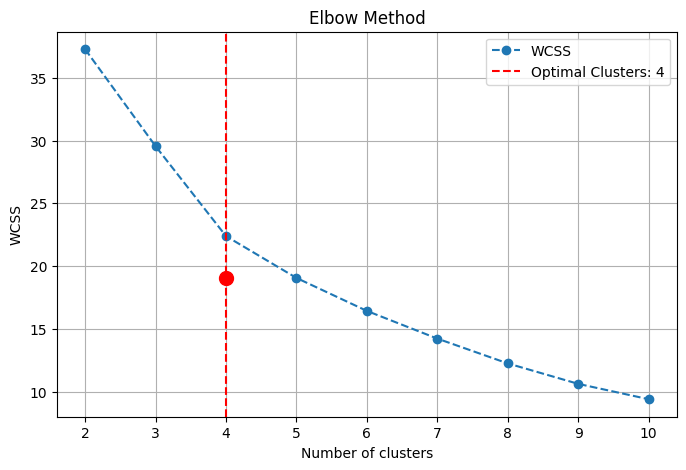

The optimal number of clusters is: 4


In [18]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [19]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_minmax_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Income,Score,KMeans_Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,1
3,0,23,16,77,3
4,0,31,17,40,3


In [25]:
import plotly.express as px
import plotly.graph_objects as go

# Base 3D scatter plot (data points)
fig = px.scatter_3d(
    df_minmax_scaled,
    x='Age',
    y='Income',
    z='Score',
    color=clusters.astype(str),   # cluster labels as strings for color
    color_discrete_sequence=px.colors.qualitative.Set2,
    size_max=10
)

# Add the cluster centroids
fig.add_trace(go.Scatter3d(
    x=kmeans.cluster_centers_[:, 0],   # assuming Age
    y=kmeans.cluster_centers_[:, 1],   # Income
    z=kmeans.cluster_centers_[:, 2],   # Score
    mode='markers+text',
    marker=dict(
        size=5,
        color='black',
        symbol='x',
        line=dict(width=2, color='white')
    ),
    text=[f'C{i}' for i in range(len(kmeans.cluster_centers_))],  # label each centroid
    textposition='top center',
    name='Centroids'
))

# Customize layout
fig.update_layout(
    title='3D Cluster Visualization with Centroids',
    legend_title='Cluster',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Income',
        zaxis_title='Score'
    )
)

fig.show()


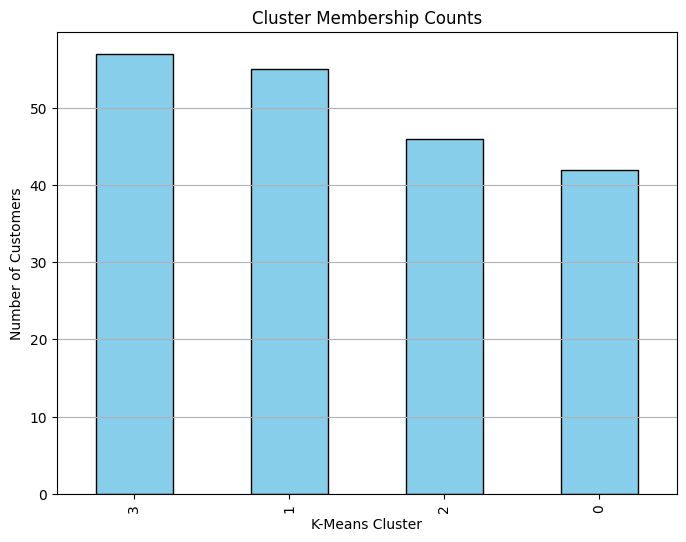

In [21]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


There are four clusters (0–3), all fairly balanced in size.

Cluster 3 has the largest number of customers (~55) — it might represent the dominant customer segment.

Cluster 0 has the fewest members (~43) — possibly a niche or specialized group.

The relatively even distribution indicates K-Means formed well-separated segments without major imbalance.

Further analysis can focus on profiling Cluster 3 (largest) and Cluster 0 (smallest) to understand what differentiates them (e.g., age, income, score).

In [29]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Score': ['mean', 'min', 'max']
})

# Calculate the mode for the 'Gender' column separately
gender_mode = df.groupby('KMeans_Cluster')['Gender'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Add the gender mode to the cluster_summary DataFrame
cluster_summary[('Gender', 'mode')] = gender_mode

# Reorder columns to place Gender mode first
cols = cluster_summary.columns.tolist()
cols = [cols[-1]] + cols[:-1]
cluster_summary = cluster_summary[cols]


cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Gender        Age             Income               Score      \
                 mode       mean min max       mean min  max       mean min   
KMeans_cluster                                                                
0                   1  52.738095  32  70  62.214286  19  137  30.642857   1   
1                   0  48.109091  20  68  58.818182  16  126  34.781818   5   
2                   1  28.000000  18  40  62.239130  15  137  64.826087   5   
3                   0  28.438596  18  40  59.666667  16  120  67.684211  29   

                    
               max  
KMeans_cluster      
0               60  
1               59  
2               97  
3               99

| **Cluster**                                        | **Persona Summary**                                                                                                                                                           | **Managerial Implications**                                                                                                                                                                                                                                                                 |
| -------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 0 – Mature Professionals**               | • Mostly **male**, around **53 years old**.<br>• **High income (~62)** but **moderate spending (~31)**.<br>• Practical and cautious spenders who value quality and stability. | **Targeting:** Premium or long-term value products (insurance, investment plans).<br>**Channel:** Email campaigns, LinkedIn, professional platforms.<br>**Offer design:** Loyalty rewards, exclusive member benefits.<br>**Retention:** Relationship-based support and after-sales service. |
| **Cluster 1 – Mid-Age Balanced Consumers**         | • Mostly **female**, around **48 years old**.<br>• **Moderate income (~59)** and **average spending (~35)**.<br>• Balanced lifestyle; practical but open to experiences.      | **Targeting:** Mid-tier family or lifestyle products.<br>**Channel:** Social media, email newsletters.<br>**Offer design:** Bundled deals, seasonal promotions.<br>**Retention:** Referral programs and membership perks.                                                                   |
| **Cluster 2 – Young, High-Spending Professionals** | • Mostly **male**, around **28 years old**.<br>• **High income (~62)** and **high spending (~65)**.<br>• Enjoys lifestyle, tech, travel, and premium experiences.             | **Targeting:** Premium or aspirational brands.<br>**Channel:** Instagram, YouTube, influencer marketing.<br>**Offer design:** Limited editions, exclusive events.<br>**Retention:** VIP programs and early access perks.                                                                    |
| **Cluster 3 – Young Value Seekers**                | • Mostly **female**, around **28 years old**.<br>• **Moderate income (~60)** and **highest spending (~68)**.<br>• Trend-driven and enjoys value-based purchases.              | **Targeting:** Fashion, lifestyle, and affordable luxury products.<br>**Channel:** TikTok, Instagram ads, flash sales.<br>**Offer design:** Discounts, bundle offers, loyalty points.<br>**Retention:** Gamified rewards and personalized recommendations.                                  |
